Nama : Lia Nurmalasari<br>
NIM : 211351073<br>
Kelas : Malam B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lianurmalasari","key":"270e0be56662315e81c7839f6f4105dd"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d matthieugimbert/french-bakery-daily-sales

french-bakery-daily-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!mkdir french-bakery-daily-sales
!unzip french-bakery-daily-sales.zip -d french-bakery-daily-sales
!ls french-bakery-daily-sales

mkdir: cannot create directory ‘french-bakery-daily-sales’: File exists
Archive:  french-bakery-daily-sales.zip
replace french-bakery-daily-sales/Bakery sales.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
'Bakery sales.csv'


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [6]:
from mlxtend.frequent_patterns import association_rules, apriori

# Data Discovery

In [7]:
df = pd.read_csv('/content/french-bakery-daily-sales/Bakery sales.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [9]:
df['article'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TRADITIONAL BAGUETTE        67689
COUPE                       20470
BAGUETTE                    15292
BANETTE                     15130
CROISSANT                   11508
                            ...  
PAIN NOIR                       1
BUCHE 8PERS                     1
CRUMBLECARAMEL OU PISTAE        1
DOUCEUR D HIVER                 1
SACHET DE VIENNOISERIE          1
Name: article, Length: 149, dtype: int64

In [10]:
df['ticket_number'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


225766.0    13
227073.0    12
241088.0    12
160751.0    12
202116.0    12
            ..
209062.0     1
209061.0     1
209060.0     1
209059.0     1
288913.0     1
Name: ticket_number, Length: 136451, dtype: int64

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
transactions = df['ticket_number'].nunique()

print('transactions in the dataset: ' + str(transactions))

transactions in the dataset: 136451


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
products = df['article'].nunique()

print('products in the dataset: ' + str(products))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


products in the dataset: 149


# EDA (minimal 5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


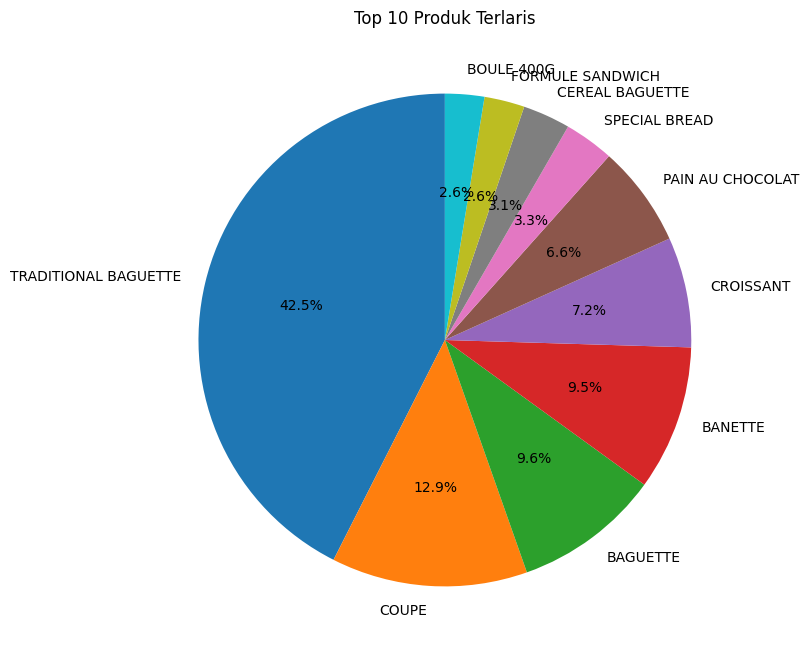

In [28]:
top_10_item = df['article'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_item, labels=top_10_item.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Produk Terlaris')
plt.show()

In [14]:
freq = (df['article'].value_counts())
freq.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TRADITIONAL BAGUETTE    67689
COUPE                   20470
BAGUETTE                15292
BANETTE                 15130
CROISSANT               11508
Name: article, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


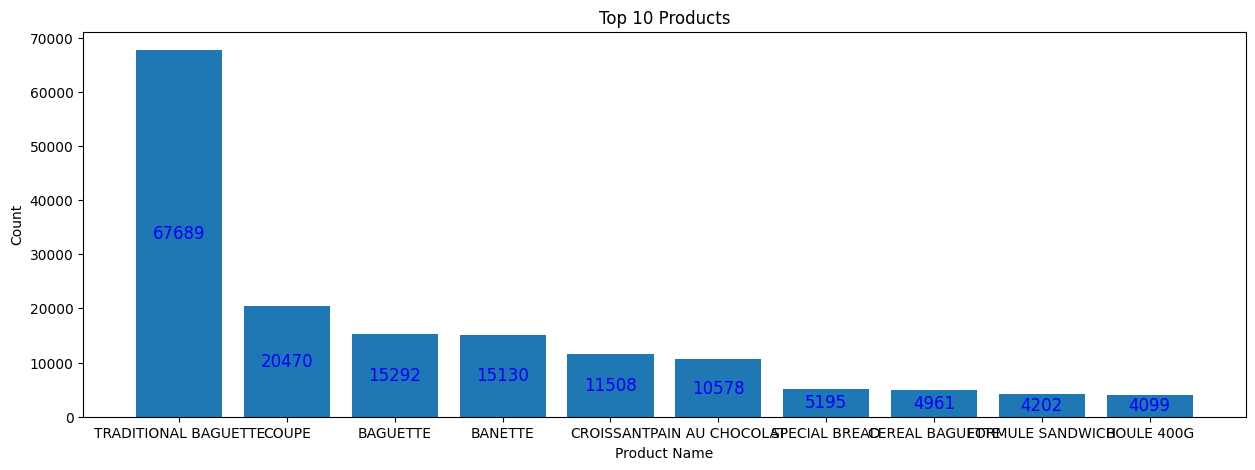

In [15]:
plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(len(freq.head(10))), height = (freq).head(10))
plt.bar_label(bars, fontsize=12, color='blue', label_type = 'center')
plt.xticks(ticks = np.arange(len(freq.head(10))), labels = freq.index[:10])

plt.title('Top 10 Products')
plt.ylabel('Count')
plt.xlabel('Product Name')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


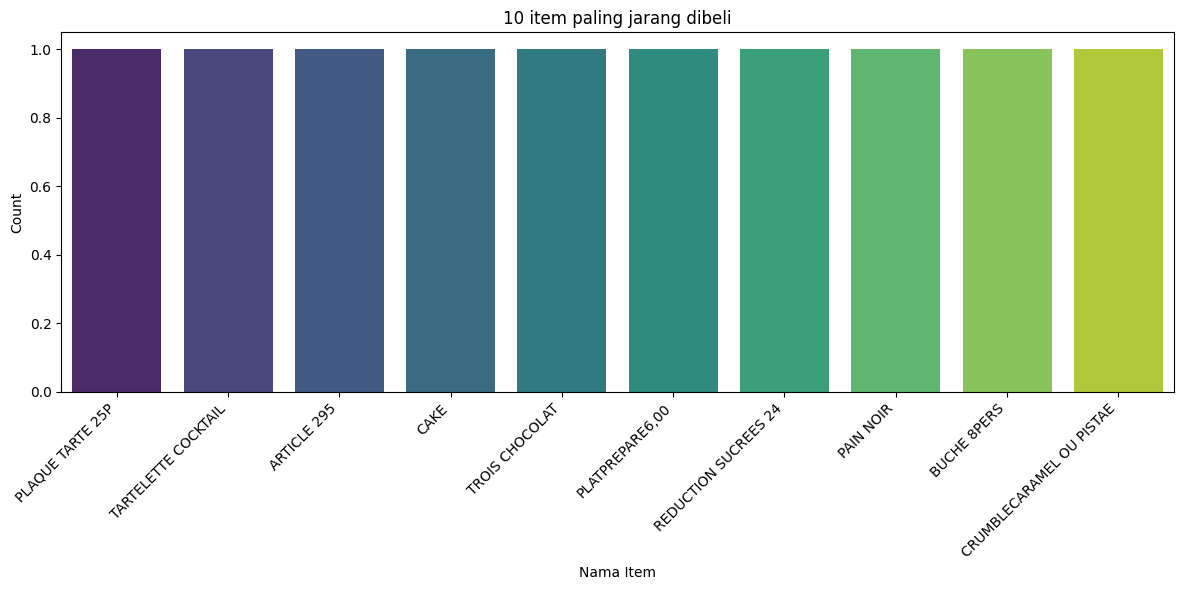

In [16]:
low_10_item = df['article'].value_counts().nsmallest(10)

plt.figure(figsize=(12, 6))
sns.countplot(x=df['article'], data=df, order=low_10_item.index, palette='viridis')
plt.xlabel('Nama Item')
plt.ylabel('Count')
plt.title('10 item paling jarang dibeli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Preprocessing

In [17]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [31]:
df['ticket_number'] = df['ticket_number'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ticket_number,article,Quantity,unit_price,date,month,weekday
0,150040,baguette,1.0,"0,90 €",2021-01-02,January,Sabtu
1,150040,pain au chocolat,3.0,"1,20 €",2021-01-02,January,Sabtu
2,150041,pain au chocolat,2.0,"1,20 €",2021-01-02,January,Sabtu
3,150041,pain,1.0,"1,15 €",2021-01-02,January,Sabtu
4,150042,traditional baguette,5.0,"1,20 €",2021-01-02,January,Sabtu


In [18]:
df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
df = df.drop(['date','time'],axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ticket_number,article,Quantity,unit_price,Datetime
0,150040.0,BAGUETTE,1.0,"0,90 €",2021-01-02 08:38:00
1,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",2021-01-02 08:38:00
2,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",2021-01-02 09:14:00
3,150041.0,PAIN,1.0,"1,15 €",2021-01-02 09:14:00
4,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",2021-01-02 09:25:00


In [21]:
df['date'] = df['Datetime'].dt.date

df['month'] = df['Datetime'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

df['weekday'] = df['Datetime'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),
                                          ('Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu'))

df.drop('Datetime', axis = 1, inplace = True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ticket_number,article,Quantity,unit_price,date,month,weekday
0,150040.0,BAGUETTE,1.0,"0,90 €",2021-01-02,January,Sabtu
1,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",2021-01-02,January,Sabtu
2,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",2021-01-02,January,Sabtu
3,150041.0,PAIN,1.0,"1,15 €",2021-01-02,January,Sabtu
4,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",2021-01-02,January,Sabtu


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


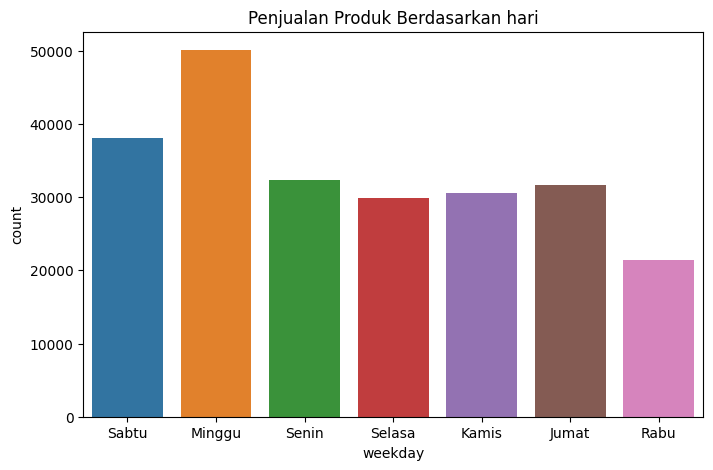

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='weekday',data=df)
plt.title('Penjualan Produk Berdasarkan hari')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


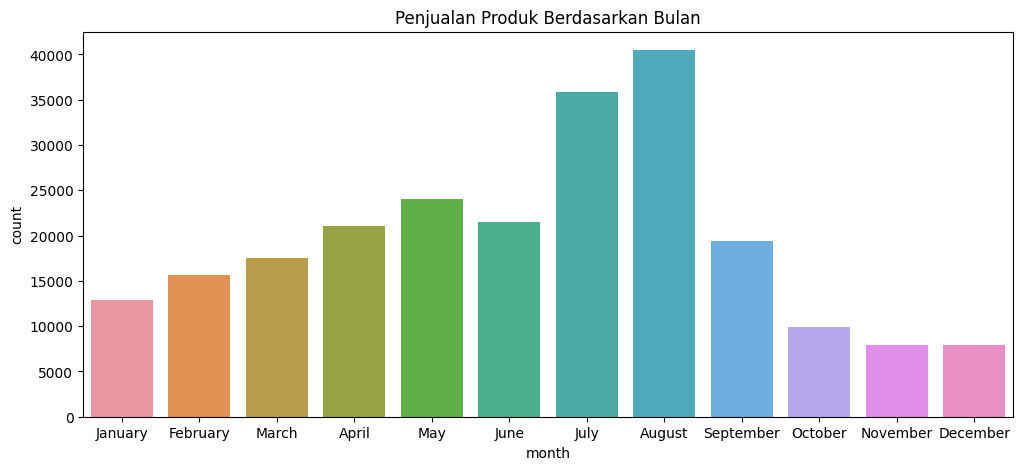

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x='month',data=df)
plt.title('Penjualan Produk Berdasarkan Bulan')
plt.show()

In [30]:
df['article'] = df['article'].apply(lambda item: item.lower())
df['article'] = df['article'].apply(lambda item: item.strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
df = df[["ticket_number", "article"]].copy()
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ticket_number,article
0,150040,baguette
1,150040,pain au chocolat
2,150041,pain au chocolat
3,150041,pain
4,150042,traditional baguette


# modeling

In [34]:
item_count = df.groupby(["ticket_number", "article"])["article"].count().reset_index(name="Count")
item_count.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ticket_number,article,Count
0,150040,baguette,1
1,150040,pain au chocolat,1
2,150041,pain,1
3,150041,pain au chocolat,1
4,150042,traditional baguette,1
5,150043,baguette,1
6,150043,croissant,1
7,150044,banette,1
8,150045,croissant,1
9,150045,traditional baguette,1


In [35]:
item_count_pivot = item_count.pivot_table(index='ticket_number', columns='article', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset : ", item_count_pivot.shape)
item_count_pivot.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ukuran Dataset :  (136451, 149)


article,.,12 macaron,armoricain,article 295,baguette,baguette apero,baguette graine,banette,banettine,boisson 33cl,...,the,traditional baguette,traiteur,triangles,trois chocolat,tropezienne,tropezienne framboise,tulipe,viennoise,vik bread
ticket_number,,,,,,,,,,,,,,,,,,,,,
150040,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


article,.,12 macaron,armoricain,article 295,baguette,baguette apero,baguette graine,banette,banettine,boisson 33cl,...,the,traditional baguette,traiteur,triangles,trois chocolat,tropezienne,tropezienne framboise,tulipe,viennoise,vik bread
ticket_number,,,,,,,,,,,,,,,,,,,,,
150040,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150042,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
150043,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150044,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
def encode(x):
    if x <=0:
        return 0
    elif x >= 1:
        return 1

item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


article,.,12 macaron,armoricain,article 295,baguette,baguette apero,baguette graine,banette,banettine,boisson 33cl,...,the,traditional baguette,traiteur,triangles,trois chocolat,tropezienne,tropezienne framboise,tulipe,viennoise,vik bread
ticket_number,,,,,,,,,,,,,,,,,,,,,
150040,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150042,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
150043,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150044,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print("Ukuran Dataset : ", item_count_pivot.shape)
print("Jumlah Transaksi : ", item_count_pivot.shape[0])
print("Jumlah Item : ", item_count_pivot.shape[1])

Ukuran Dataset :  (136451, 149)
Jumlah Transaksi :  136451
Jumlah Item :  149


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
support = 0.02
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
14,0.494940,(traditional baguette)
7,0.142351,(coupe)
0,0.111930,(baguette)
1,0.110714,(banette)
8,0.083884,(croissant)
11,0.077163,(pain au chocolat)
19,0.044822,"(coupe, traditional baguette)"
20,0.039531,"(pain au chocolat, croissant)"
12,0.037977,(special bread)
5,0.036277,(cereal baguette)


# Visualisasi hasil algoritma

In [42]:
metric = "lift"
min_treshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_treshold)[["antecedents","consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
2,(campagne),(coupe),0.022807,0.799589,5.617005
0,(boule 400g),(coupe),0.023759,0.794219,5.579279
4,(special bread),(coupe),0.022345,0.588383,4.133311
6,(pain au chocolat),(croissant),0.039531,0.512299,6.107265
7,(croissant),(pain au chocolat),0.039531,0.471256,6.107265
1,(coupe),(boule 400g),0.023759,0.166907,5.579279
3,(coupe),(campagne),0.022807,0.160214,5.617005
5,(coupe),(special bread),0.022345,0.156971,4.133311


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


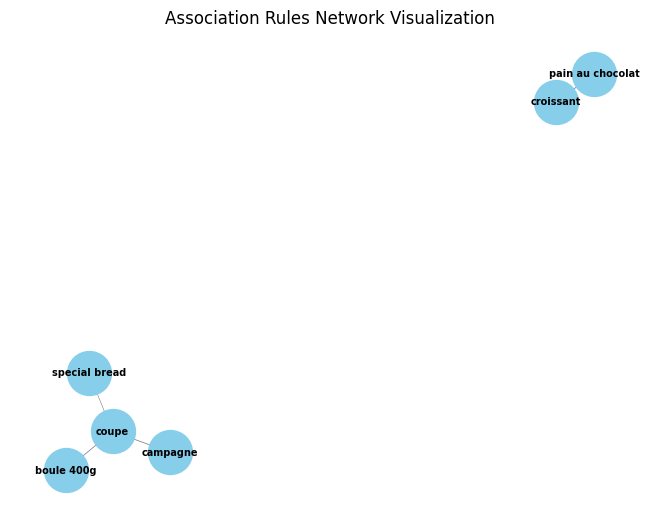

In [43]:
G = nx.Graph()

for index, row in rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, font_size=7, node_size=1000, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', width=[d['weight'] * 0.1 for u, v, d in G.edges(data=True)])
plt.title('Association Rules Network Visualization')
plt.show()

# save model (pickle)

In [ ]:
code 1

In [ ]:
code 2

In [ ]:
code 3